In [1]:
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=1

import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import xarray as xr

from mydedalustools import *    
import h5py

%load_ext autoreload
%autoreload 2

env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=1


In [2]:
meter = 1 / 6.37122e6
hour = 1
second = hour / 3600
day = hour*24
Kelvin = 1

In [3]:
## Earth parameters
#R_E = 6.4e6*meter
#Omega_E = 2*np.pi/86400 / second
#Omega = Omega_E
#R = R_E
## Set Parameters
#Ro_T = 2.
#E = 0.02
#tau_rad_nondim = 400
## Diagnostic Parameters
#taurad = tau_rad_nondim/(2*Omega)
#taudrag = 1/(2*Omega*E)

In [4]:
def plot_one_theta_wind(ax,theta,wind,vmin=300,vmax=370,cmap = plt.cm.viridis,scale=None,wind_disc=1):
        ((theta)/Kelvin).plot.contourf(ax=ax,y='latitude',levels=18,cmap=cmap,vmin=vmin,vmax=vmax)
        n=2*wind_disc;m=wind_disc
        ax.quiver(wind.longitude[::n],
                  wind.latitude[::m] ,
                  wind[0][::n,::m].T,
                  -wind[1][::n,::m].T,
                  scale=scale)

# Dry convection

In [5]:
name='snapshots_2level_T21_locked_10_p02_200_p05_notopheating'
snapshots_notopheating = open_h5_withmixed(name)

pre load 4.1 sec


In [8]:
name='snapshots_2level_T21_locked_10_p02_200_p05'
snapshots_control = open_h5s_withmixed(name,('s1','s2'))

pre load 0.1 sec
pre load 4.0 sec


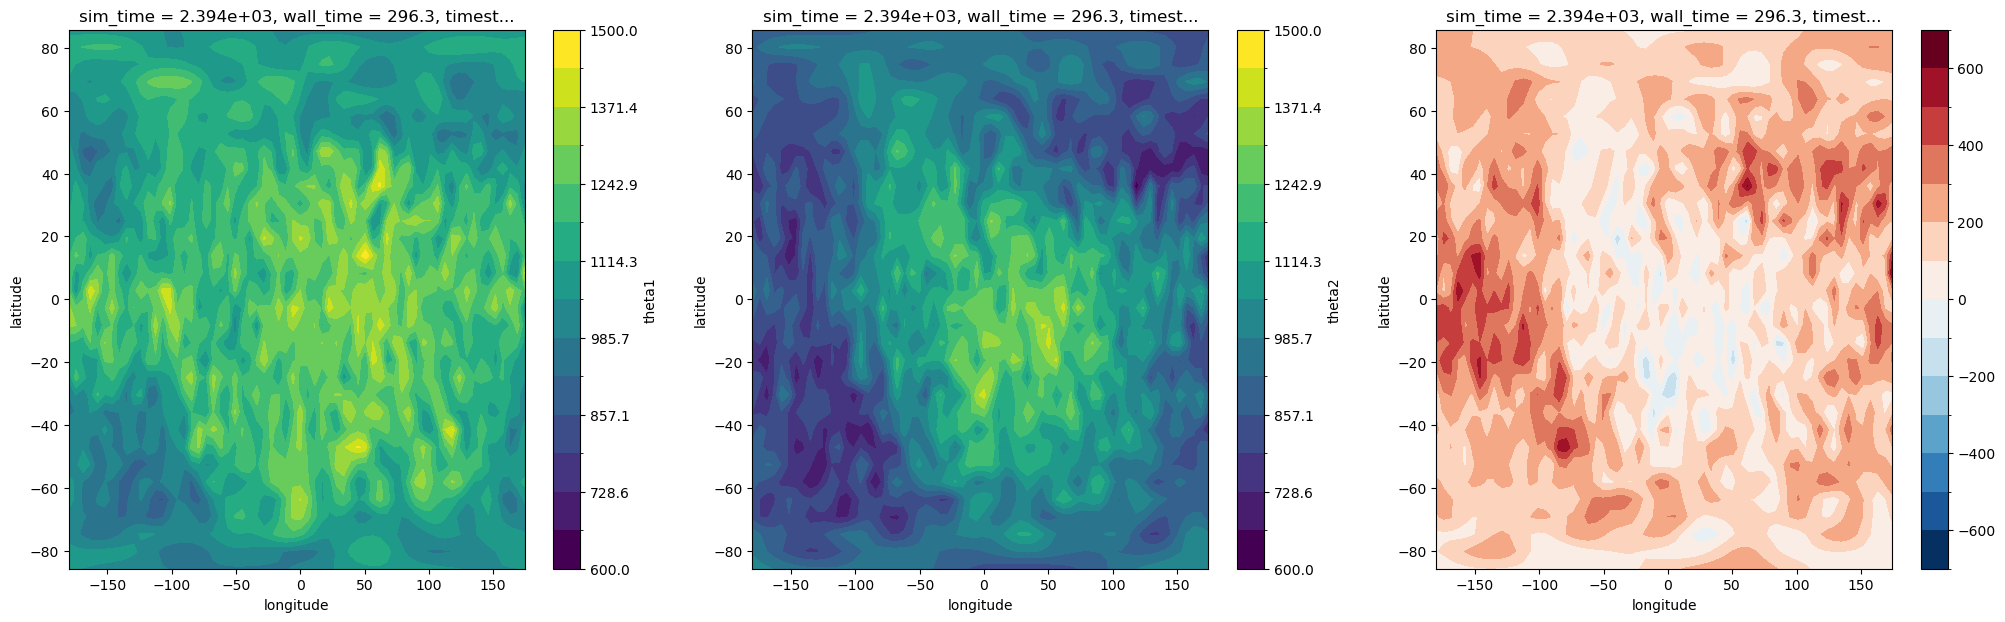

In [12]:
_,axs=plt.subplots(1,3,figsize=(25,7))
(snapshots_notopheating.theta1[-1]).plot.contourf(ax=axs[0],y='latitude',vmin=600,vmax=1500,levels=15)
(snapshots_notopheating.theta2[-1]).plot.contourf(ax=axs[1],y='latitude',vmin=600,vmax=1500,levels=15)
(snapshots_notopheating.theta1[-1]-snapshots_notopheating.theta2[-1]).plot.contourf(ax=axs[2],y='latitude',levels=15)

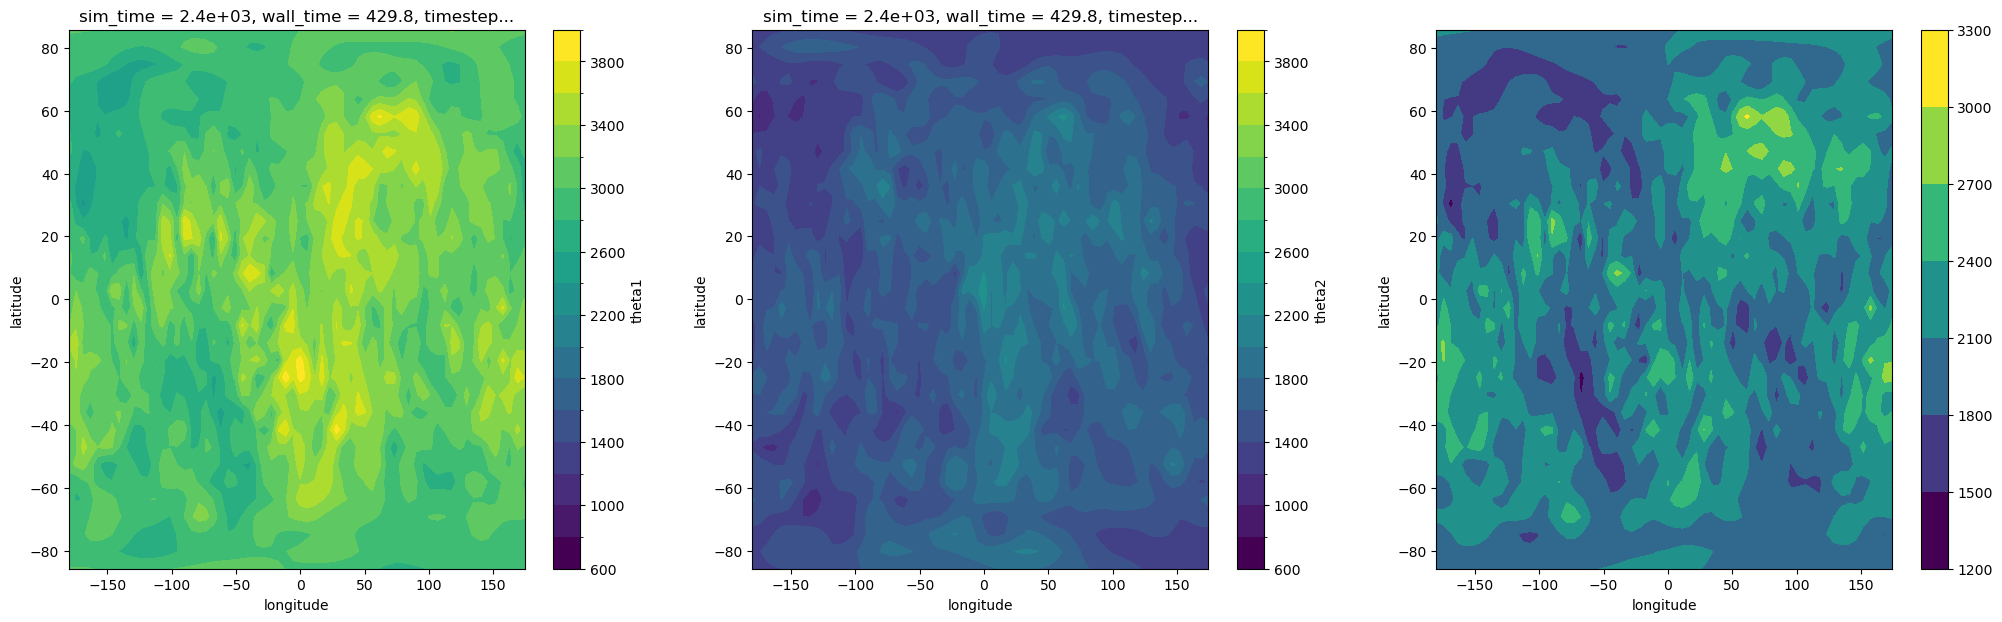

In [15]:
_,axs=plt.subplots(1,3,figsize=(25,7))
(snapshots_control.theta1[-1]).plot.contourf(ax=axs[0],y='latitude',vmin=600,vmax=4000,levels=18)
(snapshots_control.theta2[-1]).plot.contourf(ax=axs[1],y='latitude',vmin=600,vmax=4000,levels=18)
(snapshots_control.theta1[-1]-snapshots_notopheating.theta2[-1]).plot.contourf(ax=axs[2],y='latitude')

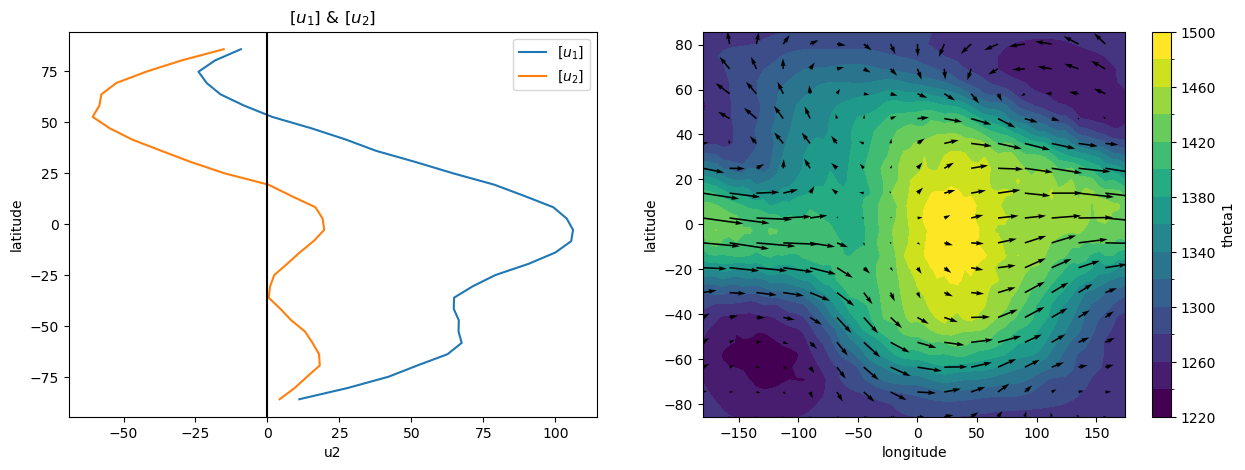

In [15]:
def finalmean(u):
    return u[-20*48:].mean(('t'))/(meter/second)
def finalmeant(u):
    return u[-20*48:].mean(('t'))/(Kelvin)
_,axs = plt.subplots(1,2,figsize=(15,5))
finalmean(snapshots_notopheating.u1[:,0]).mean('longitude').plot(ax=axs[0],y='latitude',label=r'$[u_1]$')
finalmean(snapshots_notopheating.u2[:,0]).mean('longitude').plot(ax=axs[0],y='latitude',label=r'$[u_2]$')
axs[0].axvline(0.,color='k')
axs[0].legend()
axs[0].set_title(r'$[u_1]$ & $[u_2]$')

plot_one_theta_wind(axs[1],finalmeant(snapshots_notopheating.theta1),finalmean(snapshots_notopheating.u1),vmin=None,vmax=None,wind_disc=2)


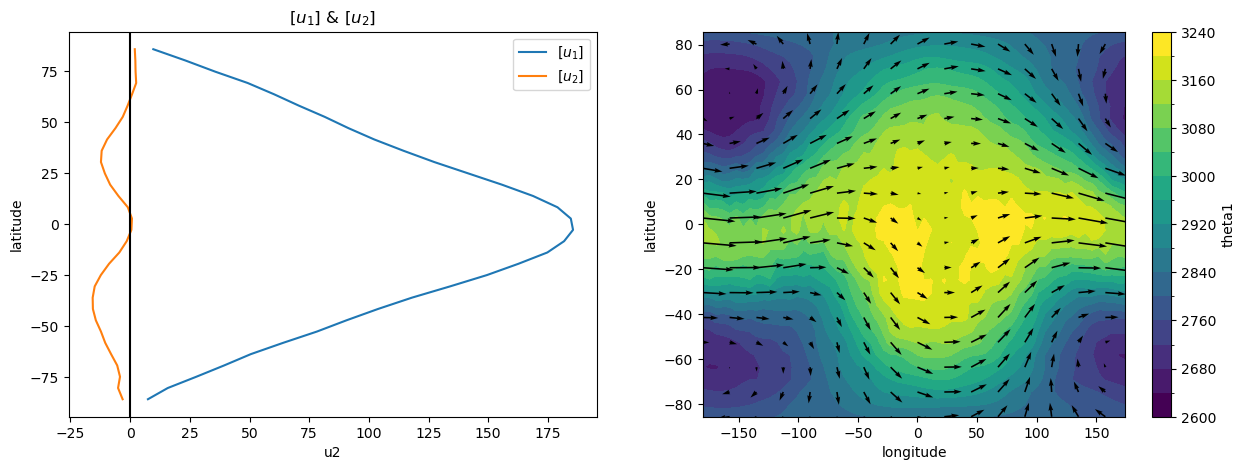

In [17]:
def finalmean(u):
    return u[-20*48:].mean(('t'))/(meter/second)
def finalmeant(u):
    return u[-20*48:].mean(('t'))/(Kelvin)
_,axs = plt.subplots(1,2,figsize=(15,5))
finalmean(snapshots_control.u1[:,0]).mean('longitude').plot(ax=axs[0],y='latitude',label=r'$[u_1]$')
finalmean(snapshots_control.u2[:,0]).mean('longitude').plot(ax=axs[0],y='latitude',label=r'$[u_2]$')
axs[0].axvline(0.,color='k')
axs[0].legend()
axs[0].set_title(r'$[u_1]$ & $[u_2]$')

plot_one_theta_wind(axs[1],finalmeant(snapshots_control.theta1),finalmean(snapshots_control.u1),vmin=None,vmax=None,wind_disc=2)
